In [21]:
import matplotlib.pyplot as plt
import numpy as np

from superfv import (
    OutputLoader,
    plot_2d_slice,
    plot_timeseries,
)

base_path = "/scratch/gpfs/jp7427/out/isotropic-decaying-turbulence/"

In [26]:
sim = OutputLoader(base_path + "256x256/cupy/MUSCL-Hancock/M_max_50/seed_02")

Successfully read simulation output from "/scratch/gpfs/jp7427/out/isotropic-decaying-turbulence/256x256/cupy/MUSCL-Hancock/M_max_50/seed_02"


(<matplotlib.image.AxesImage at 0x14bcbae331d0>,
 <matplotlib.colorbar.Colorbar at 0x14bcba331670>)

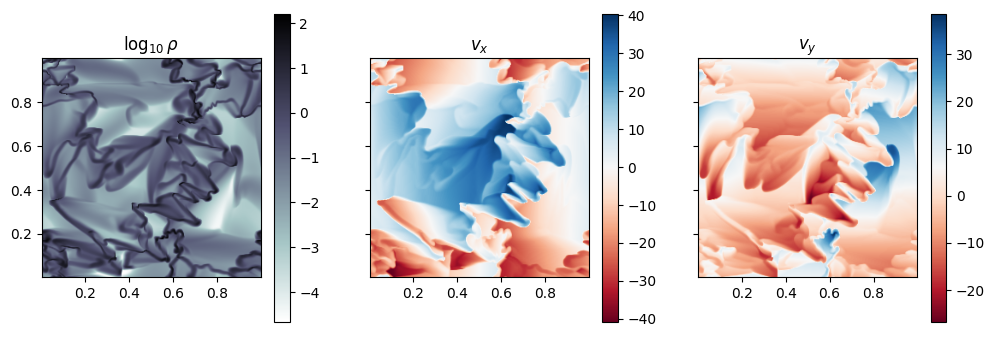

In [27]:
fig, axs = plt.subplots(1, 3, sharex=True, sharey=True, figsize=(12, 4))

axs[0].set_title(r"$\log_{10} \rho$")
axs[1].set_title(r"$v_x$")
axs[2].set_title(r"$v_y$")

plot_2d_slice(
    sim,
    axs[0],
    "rho",
    cell_averaged=True,
    func=lambda x: np.log10(x),
    colorbar=True,
    cmap="bone_r",
)
plot_2d_slice(sim, axs[1], "vx", cell_averaged=True, colorbar=True, cmap="RdBu")
plot_2d_slice(sim, axs[2], "vy", cell_averaged=True, colorbar=True, cmap="RdBu")

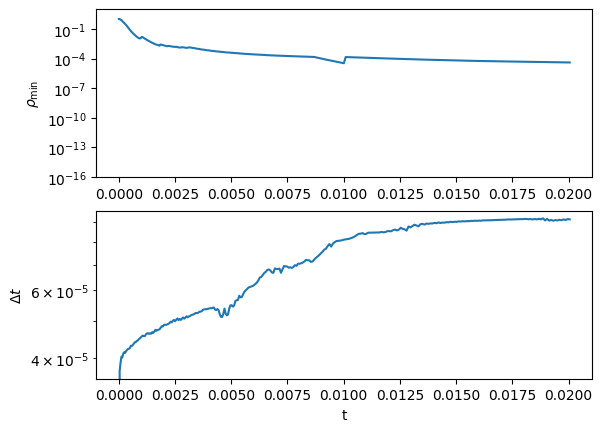

In [5]:
fig, axs = plt.subplots(2, 1)

axs[0].set_ylabel(r"$\rho_{\min}$")
axs[0].set_ylim(1e-16, 10)
axs[1].set_ylabel(r"$\Delta t$")
axs[1].set_xlabel("t")
axs[0].set_yscale("log")
axs[1].set_yscale("log")

plot_timeseries(sim, axs[0], "rho_min", fine=True)
plot_timeseries(sim, axs[1], "dt")